In [13]:
import os
import sys
cwd = os.getcwd()
module_path = os.path.abspath(os.path.join('..'))
sys.path.insert(0, os.path.join(cwd, "../"))

import pickle
import torch
import importlib
import numpy as np
import pandas as pd

import src.bin.tensorify as tensorify
import src.utils.data_conversion_utils as conversions
import src.data_manager.student_life_var_binned_data_manager as data_manager
import src.bin.trainer as trainer

from sklearn import metrics

from torch import nn
from src import definitions
from src.bin import statistics
from src.bin import plotting
from src.utils.read_utils import read_pickle
from src.utils import student_utils
from tabulate import tabulate 
import src.models.simple as simple_models   

pd.set_option('max_rows', 10000)

importlib.reload(statistics)
importlib.reload(conversions)
importlib.reload(tensorify)
importlib.reload(plotting)
importlib.reload(trainer)
importlib.reload(data_manager)
importlib.reload(student_utils)
importlib.reload(simple_models)
feature_list = data_manager.FEATURE_LIST

student_list = [2, 46]

unnormalized_data = data_manager.get_data_for_training_in_dict_format(*student_list, normalize=False, fill_na=False)
statistics_df, raw_df = statistics.get_statistics_on_data_dict(unnormalized_data, feature_list)
# display(raw_df)
data = data_manager.get_data_for_training_in_dict_format(*student_list, normalize=True, fill_na=True)
print(statistics.get_train_test_val_label_counts_from_raw_data(data))


label_2_key = []

for key in data['data']:
    if data['data'][key][3] == 2 and key in data['train_ids']:
        label_2_key.append(key)
        
# data['train_ids'] += label_2_key

print(statistics.get_train_test_val_label_counts_from_raw_data(data))
print(len(data['train_ids']))


      Train    Val    Test
--  -------  -----  ------
 0        9      6       0
 1        9      6       2
 2       11      4       3
      Train    Val    Test
--  -------  -----  ------
 0        9      6       0
 1        9      6       2
 2       11      4       3
29


In [14]:
data = tensorify.tensorify_data_gru_d(data)
# input_data, label = data['data']['35_4_21_19']

In [16]:
################################## Init ##################################
first_key = next(iter(data['data'].keys()))
# features = len(data['data'][first_key][0][0][0])
features = len(feature_list)
in_channels = 3
out_channels = 24
kernel_size = (12, 14)
stride=2
padding=1
learning_rate = 0.001
n_epochs = 15
# small_data = data['data'][first_key][0].unsqueeze(0)

model = simple_models.SimpleCNN(in_channels=in_channels,
                  out_channels=out_channels,
                  kernel_size=kernel_size,
                  stride=stride, 
                  padding=padding)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
criterion = torch.nn.CrossEntropyLoss()

xxxxxxxxxxxxxx epoch: 0 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        4      0       0
 1        2      0       0
 2       23     16       5


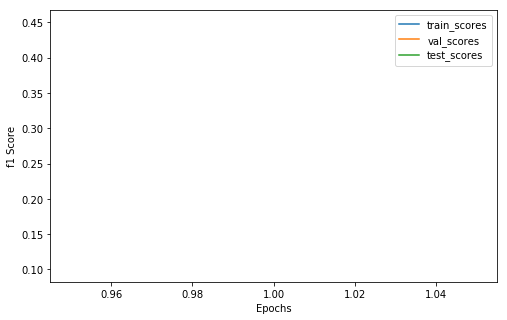

xxxxxxxxxxxxxx epoch: 1 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        0      0       0
 1        0      0       0
 2       29     16       5


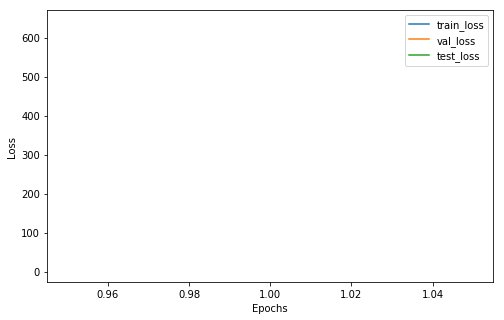

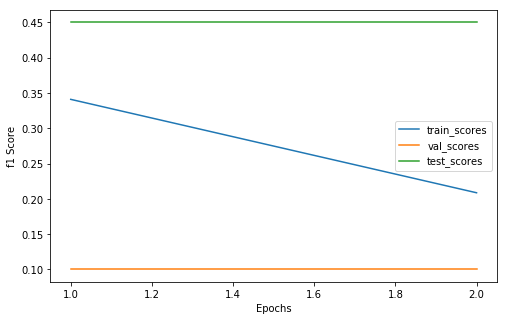

xxxxxxxxxxxxxx epoch: 2 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        0      0       0
 1        0      0       0
 2       29     16       5


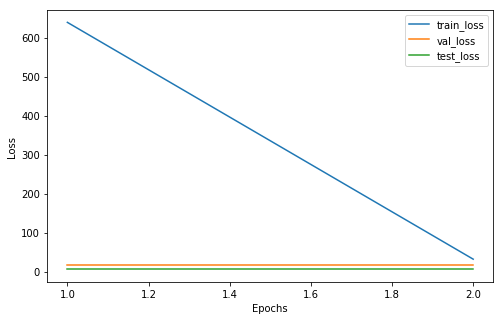

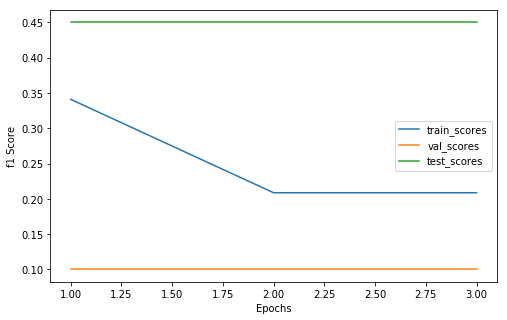

xxxxxxxxxxxxxx epoch: 3 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        0      0       0
 1        0      0       0
 2       29     16       5


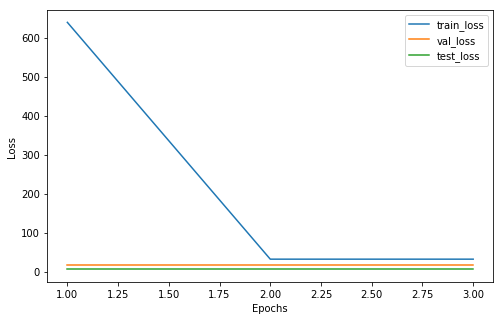

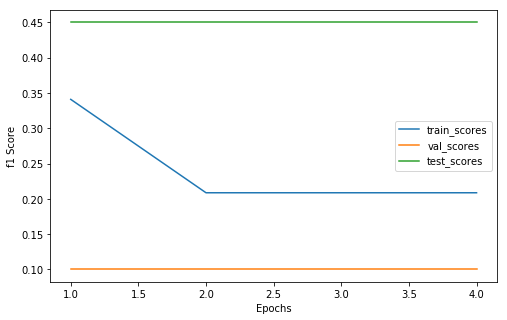

xxxxxxxxxxxxxx epoch: 4 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        0      0       0
 1        0      0       0
 2       29     16       5


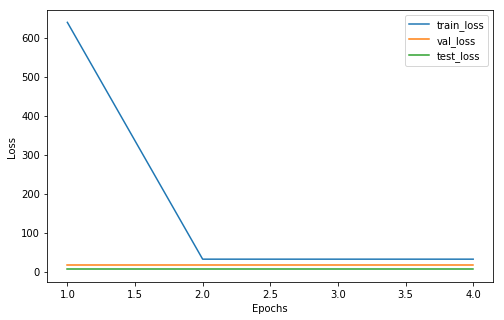

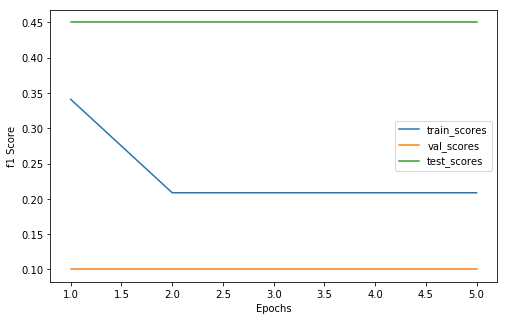

xxxxxxxxxxxxxx epoch: 5 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        0      0       0
 1        0      0       0
 2       29     16       5


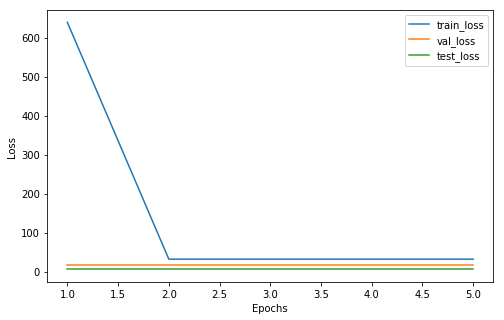

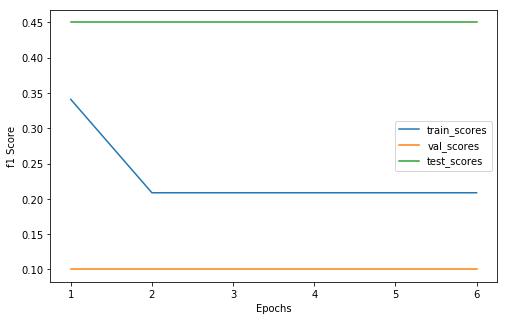

xxxxxxxxxxxxxx epoch: 6 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        0      0       0
 1        0      0       0
 2       29     16       5


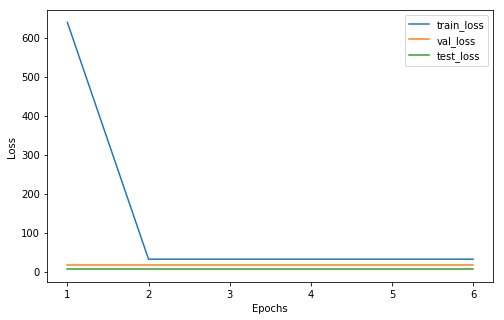

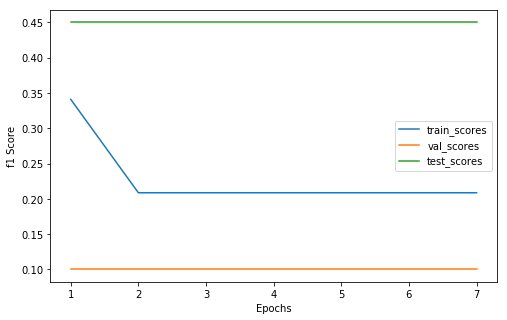

xxxxxxxxxxxxxx epoch: 7 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        0      0       0
 1        0      0       0
 2       29     16       5


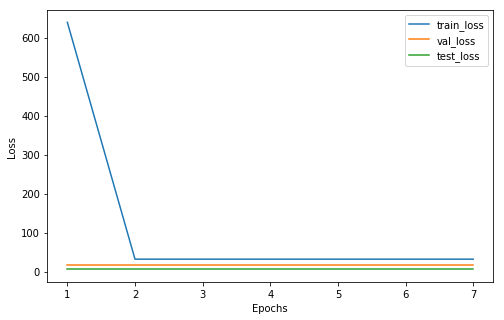

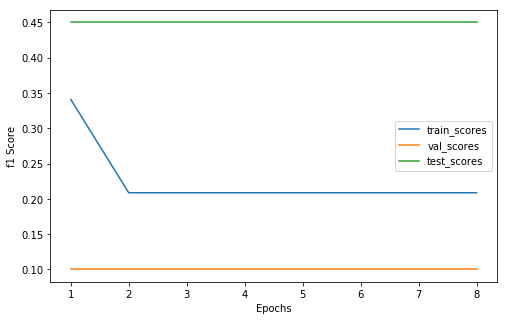

xxxxxxxxxxxxxx epoch: 8 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        0      0       0
 1        0      0       0
 2       29     16       5


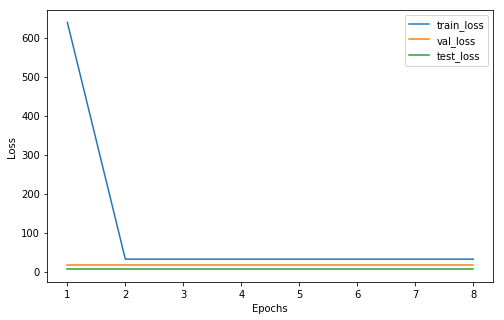

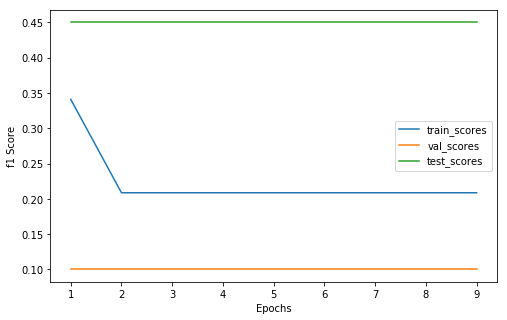

xxxxxxxxxxxxxx epoch: 9 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        0      0       0
 1        0      0       0
 2       29     16       5


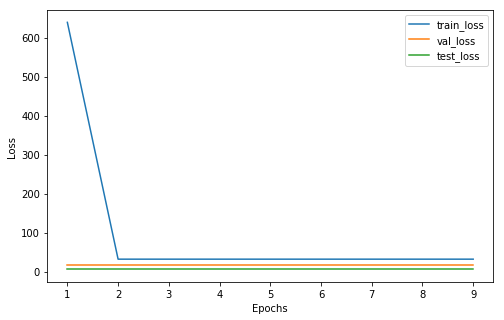

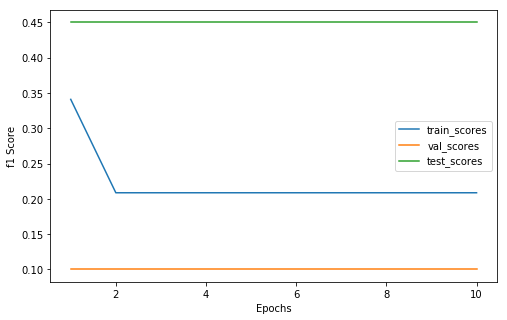

xxxxxxxxxxxxxx epoch: 10 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        0      0       0
 1        0      0       0
 2       29     16       5


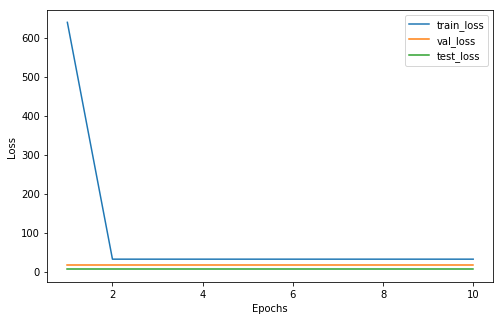

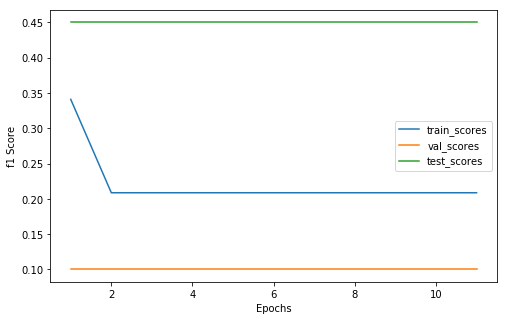

xxxxxxxxxxxxxx epoch: 11 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        0      0       0
 1        0      0       0
 2       29     16       5


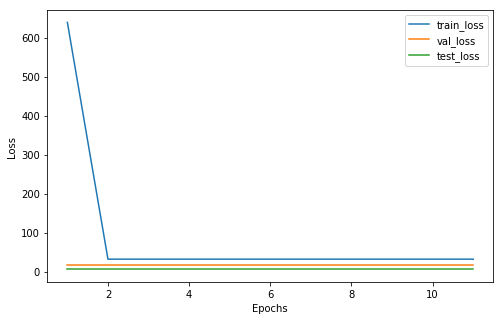

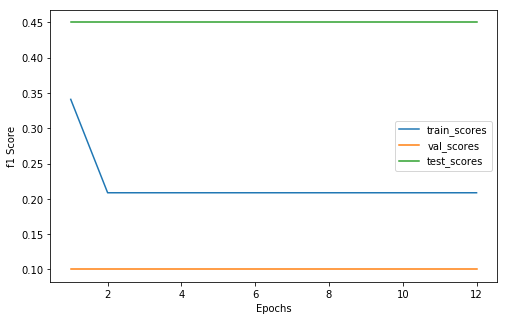

xxxxxxxxxxxxxx epoch: 12 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        0      0       0
 1        0      0       0
 2       29     16       5


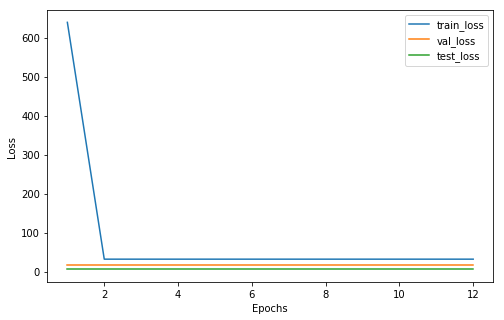

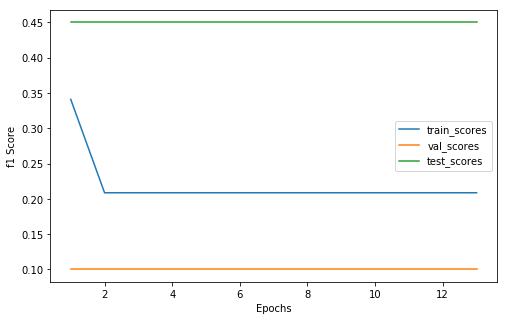

xxxxxxxxxxxxxx epoch: 13 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        0      0       0
 1        0      0       0
 2       29     16       5


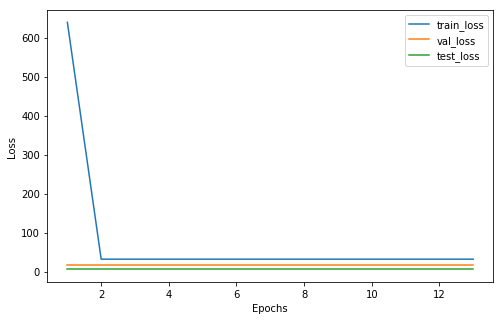

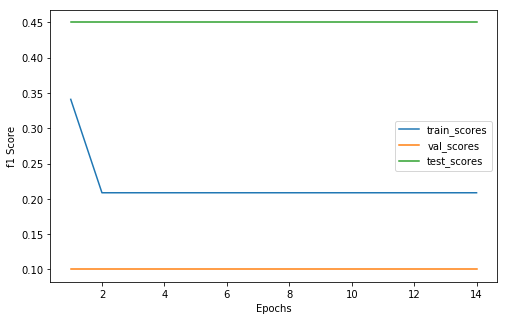

xxxxxxxxxxxxxx epoch: 14 xxxxxxxxxxxxxx
Cofusion Matrix For Val Set: 
-  -  -
0  0  6
0  0  6
0  0  4
-  -  -
Predicted Label Distribution:
      Train    Val    Test
--  -------  -----  ------
 0        0      0       0
 1        0      0       0
 2       29     16       5


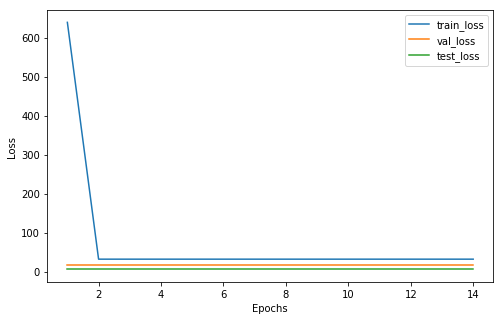

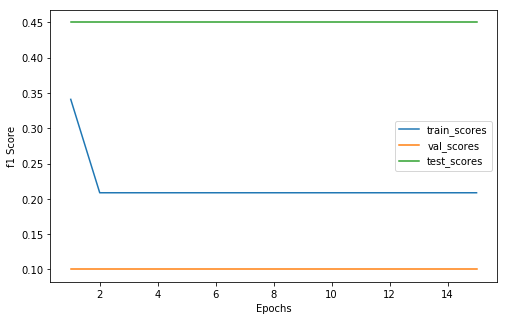

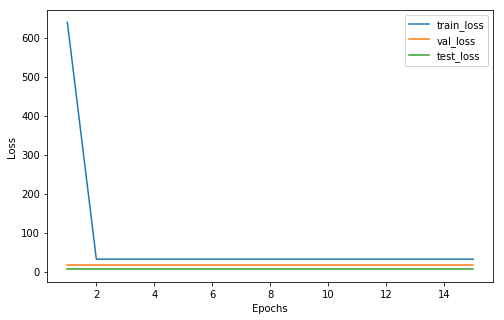

In [17]:
loss_over_epochs, scores_over_epochs = plotting.get_empty_stat_over_n_epoch_dictionaries()

for epoch in range(n_epochs):
    print("xxxxxxxxxxxxxx epoch: {} xxxxxxxxxxxxxx".format(epoch))
    train_loss, train_labels, train_preds =  trainer.evaluate_set(data, 'train_ids', model, criterion, optimizer)
    val_loss, val_labels, val_preds =  trainer.evaluate_set(data, 'val_ids', model, criterion)
    test_loss, test_labels, test_preds =  trainer.evaluate_set(data, 'test_ids', model, criterion)
    
    print("Cofusion Matrix For Val Set: ")
    print(tabulate( metrics.confusion_matrix(val_labels, val_preds)))
    print("Predicted Label Distribution:")
    print(statistics.get_train_test_val_label_counts_from_predictions(train_preds, val_preds, test_preds))
    
    loss_over_epochs['train_loss'].append(train_loss)
    loss_over_epochs['val_loss'].append(val_loss)
    loss_over_epochs['test_loss'].append(test_loss)
    
    scores_over_epochs['train_scores'].append(metrics.precision_recall_fscore_support(train_labels,
                                                                                     train_preds, 
                                                                                     average='weighted'))
    scores_over_epochs['val_scores'].append(metrics.precision_recall_fscore_support(val_labels, 
                                                                                       val_preds, 
                                                                                   average='weighted'))
    scores_over_epochs['test_scores'].append( metrics.precision_recall_fscore_support(test_labels,
                                                                                     test_preds,
                                                                                     average='weighted'))
    
    plotting.plot_score_over_n_epochs(scores_over_epochs, score_type='f1', fig_size=(8,5))
    plotting.plot_loss_over_n_epochs(loss_over_epochs, fig_size=(8, 5))